# Project 3 - Part 4: Hypothesis Testing

# Business Problem

For this project, you have been hired to produce a MySQL database on Movies from a subset of IMDB's publicly available dataset. Ultimately, you will use this database to analyze what makes a movie successful, and will provide recommendations to the stakeholder on how to make a successful movie.

## Part 4 

 For part 4 of the project, you will be using your MySQL database from part 3 to answer meaningful questions for your stakeholder. They want you to use your hypothesis testing and statistics knowledge to answer 3 questions about what makes a successful movie.

#### Questions to Answer

#### The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

 - They want you to perform a statistical test to get a mathematically-supported answer.
 - They want you to report if you found a significant difference between ratings.
  - If so, what was the p-value of your analysis?
  - And which rating earns the most revenue?
 - They want you to prepare a visualization that supports your finding.
 
 - It is then up to you to think of 2 additional hypotheses to test that your stakeholder may want to know.

Some example hypotheses you could test:

 - Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?
 
 - Do movies released in 2020 earn less revenue than movies released in 2018?

  - How do the years compare for movie ratings?

 - Do some movie genres earn more revenue than others?

 - Are some genres higher rated than others?
 - etc.

## Specifications

#### Your Data

- A critical first step for this assignment will be to retrieve additional movie data to add to your SQL database.
  - You will want to use the TMDB API again and extract data for additional years.
  - You may want to review the optional lesson from Week 1 on "Using Glob to Load Many Files" to load and combine all of your API results for each year.
- However, trying to extract the TMDB data for all movies from 2000-2022 could take >24 hours!
- To address this issue, you should EITHER:
   - Define a smaller (but logical) period of time to use for your analyses (e.g., last 10 years, 2010-2019 (pre-pandemic, etc).
   - OR coordinate with cohort-mates and divide the API calls so that you can all download the data for a smaller number of years and then share your downloaded JSON data.

## Deliverables

- You should use the same project repository you have been using for Parts 1-3 (for your portfolio).
  - Create a new notebook in your project repository just for the hypothesis testing (like "Part 4 - Hypothesis Testing.ipynb")
  - Make sure the results and visualization for all 3 hypotheses are in your notebook.

Please submit the link to your GitHub repository for this assignment.

---

## Data

We will be extracting more data from our TMDB API data base again. Then we will continue to combined our data into one data frame. 

In [241]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [242]:
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 '2000-2009',
 '2010-2021',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz']

In [243]:
#pd.read_csv(file_list[2])

In [244]:
file_list[2]

'2010-2021'

In [245]:
FOLDER + file_list[2]

'Data/2010-2021'

In [246]:
pd.read_csv(FOLDER + file_list[4])

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,tt6174238,0.0,NaN,"{'id': 404302, 'name': 'Cold War Collection', ...",0.0,"[{'id': 80, 'name': 'Crime'}]",NaN,223878.0,en,Cold War,...,0.0,0.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Cold War,0.0,2.0,2.0,NaN
1194,tt7029820,0.0,NaN,NaN,0.0,[],NaN,604889.0,en,Scream For Christmas,...,0.0,80.0,[],Released,NaN,Scream For Christmas,0.0,0.0,0.0,NaN
1195,tt7197642,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,872676.0,en,"Goodbye, Merry-Go-Round",...,0.0,90.0,[],Released,NaN,"Goodbye, Merry-Go-Round",0.0,0.0,0.0,NaN
1196,tt7631368,0.0,/sF0gUHE0YzZNXYugTB2LFxJIppf.jpg,NaN,10000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,97186.0,fr,"I, Vampire",...,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,"I, Vampire",0.0,6.4,4.0,NR


In [247]:
import glob

In [248]:
q = FOLDER + "*.csv.gz"
print(q)

Data/*.csv.gz


In [249]:
file_list = glob.glob(q)
file_list

['Data\\combined_tmdb_data.csv.gz',
 'Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz']

In [250]:
os.listdir(FOLDER+'2010-2021')

['.ipynb_checkpoints',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz']

In [251]:
q = FOLDER+"/**/final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q,recursive=True))
file_list

Data//**/final_*.csv.gz


['Data\\2010-2021\\final_tmdb_data_2010.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2011.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2012.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2013.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2014.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2015.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2016.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2017.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2018.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2019.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2020.csv.gz',
 'Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz']

In [252]:
df = pd.concat([pd.read_csv(f,lineterminator='\n') for f in file_list])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,tt7661128,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,595306.0,en,Cold by Nature,...,250000.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Cold by Nature,0.0,0.0,0.0,PG-13
2351,tt7786614,0.0,NaN,NaN,0.0,[],NaN,616643.0,en,Ci qing,...,0.0,100.0,[],Released,NaN,Tattoo,0.0,5.0,1.0,NaN
2352,tt8170758,0.0,NaN,NaN,0.0,[],NaN,513464.0,en,The Swell Season: One Step Away,...,0.0,61.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Swell Season: One Step Away,0.0,0.0,0.0,NR
2353,tt9330112,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,...,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN


In [253]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56619 entries, 0 to 2354
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                56619 non-null  object 
 1   adult                  56598 non-null  float64
 2   backdrop_path          34405 non-null  object 
 3   belongs_to_collection  3567 non-null   object 
 4   budget                 56598 non-null  float64
 5   genres                 56598 non-null  object 
 6   homepage               13743 non-null  object 
 7   id                     56598 non-null  float64
 8   original_language      56598 non-null  object 
 9   original_title         56598 non-null  object 
 10  overview               55282 non-null  object 
 11  popularity             56598 non-null  float64
 12  poster_path            50933 non-null  object 
 13  production_companies   56598 non-null  object 
 14  production_countries   56598 non-null  object 
 15  rel

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN


In [254]:
df = df.loc[ df['imdb_id']!= '0']
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
5,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,...,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,tt7661128,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,595306.0,en,Cold by Nature,...,250000.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Cold by Nature,0.0,0.0,0.0,PG-13
2351,tt7786614,0.0,NaN,NaN,0.0,[],NaN,616643.0,en,Ci qing,...,0.0,100.0,[],Released,NaN,Tattoo,0.0,5.0,1.0,NaN
2352,tt8170758,0.0,NaN,NaN,0.0,[],NaN,513464.0,en,The Swell Season: One Step Away,...,0.0,61.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Swell Season: One Step Away,0.0,0.0,0.0,NR
2353,tt9330112,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,...,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN


In [255]:
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz',compression ='gzip', index = False)

df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz')
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
1,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
2,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
3,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
4,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,...,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56593,tt7661128,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,595306.0,en,Cold by Nature,...,250000.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Cold by Nature,0.0,0.0,0.0,PG-13
56594,tt7786614,0.0,NaN,NaN,0.0,[],NaN,616643.0,en,Ci qing,...,0.0,100.0,[],Released,NaN,Tattoo,0.0,5.0,1.0,NaN
56595,tt8170758,0.0,NaN,NaN,0.0,[],NaN,513464.0,en,The Swell Season: One Step Away,...,0.0,61.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Swell Season: One Step Away,0.0,0.0,0.0,NR
56596,tt9330112,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,...,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN


## Preprocessing

#### We will do some Preprocessing before we start doing our Hypothesis Testing.

We want to start with dropping unnecessary columns and also we will create lists to expand more data.  

In [256]:
drop_cols = ['backdrop_path','homepage', 'id','original_title','spoken_languages','production_companies','original_language','overview','tagline','video','status','production_countries','poster_path']

df = df.drop(columns=drop_cols)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0312305,0.0,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN
1,tt0326965,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13
2,tt0331312,0.0,NaN,0.0,[],0.600,2010-01-01,0.0,0.0,This Wretched Life,5.0,1.0,NaN
3,tt0393049,0.0,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",2.418,2010-05-20,0.0,98.0,Anderson's Cross,4.0,5.0,NaN
4,tt0398286,0.0,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",119.168,2010-11-24,592461732.0,100.0,Tangled,7.6,9364.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56593,tt7661128,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",0.600,2009-09-01,250000.0,77.0,Cold by Nature,0.0,0.0,PG-13
56594,tt7786614,0.0,NaN,0.0,[],0.600,2009-01-01,0.0,100.0,Tattoo,5.0,1.0,NaN
56595,tt8170758,0.0,NaN,0.0,[],0.600,2009-10-27,0.0,61.0,The Swell Season: One Step Away,0.0,0.0,NR
56596,tt9330112,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1.201,2009-09-04,0.0,145.0,Ninaithale Inikkum,4.0,1.0,NaN


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56598 entries, 0 to 56597
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                56598 non-null  object 
 1   adult                  56598 non-null  float64
 2   belongs_to_collection  3567 non-null   object 
 3   budget                 56598 non-null  float64
 4   genres                 56598 non-null  object 
 5   popularity             56598 non-null  float64
 6   release_date           55665 non-null  object 
 7   revenue                56598 non-null  float64
 8   runtime                55768 non-null  float64
 9   title                  56598 non-null  object 
 10  vote_average           56598 non-null  float64
 11  vote_count             56598 non-null  float64
 12  certification          13950 non-null  object 
dtypes: float64(7), object(6)
memory usage: 5.6+ MB


Now we will perform a function to get genres names into a list format.

In [258]:
def genre_names(x):
    x = x.replace("'",'"')
    x = json.loads(x)

    
    genres = []
    
    for genre in x:
        genres.append(genre['name'])
    
    return genres

In [259]:
df['list_genres'] = df['genres'].apply(genre_names)

In [260]:
df_explode = df.explode('list_genres')
df_explode

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,list_genres
0,tt0312305,0.0,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,Family
0,tt0312305,0.0,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,Animation
0,tt0312305,0.0,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,Science Fiction
1,tt0326965,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,Thriller
1,tt0326965,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56596,tt9330112,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1.201,2009-09-04,0.0,145.0,Ninaithale Inikkum,4.0,1.0,NaN,Drama
56596,tt9330112,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1.201,2009-09-04,0.0,145.0,Ninaithale Inikkum,4.0,1.0,NaN,Thriller
56596,tt9330112,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1.201,2009-09-04,0.0,145.0,Ninaithale Inikkum,4.0,1.0,NaN,Mystery
56597,tt9556198,0.0,"{'id': 866148, 'name': 'Deep Sea Monster Raiga...",0.0,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",0.840,2009-08-15,0.0,80.0,Deep Sea Monster Raiga,7.7,3.0,NaN,Action


In [261]:
unique_df = df_explode['list_genres'].dropna().unique()
unique_df

array(['Family', 'Animation', 'Science Fiction', 'Thriller', 'Mystery',
       'Drama', 'Romance', 'Comedy', 'War', 'Crime', 'Action',
       'Adventure', 'Horror', 'Fantasy', 'History', 'Western', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [262]:
#df['list_genres'] = df['list_genres'].str.strip()

In [263]:
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,list_genres
0,tt0312305,0.0,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,"[Family, Animation, Science Fiction]"
1,tt0326965,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,"[Thriller, Mystery, Drama]"
2,tt0331312,0.0,NaN,0.0,[],0.600,2010-01-01,0.0,0.0,This Wretched Life,5.0,1.0,NaN,[]
3,tt0393049,0.0,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",2.418,2010-05-20,0.0,98.0,Anderson's Cross,4.0,5.0,NaN,"[Romance, Comedy, Drama]"
4,tt0398286,0.0,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",119.168,2010-11-24,592461732.0,100.0,Tangled,7.6,9364.0,PG,"[Animation, Family]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56593,tt7661128,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",0.600,2009-09-01,250000.0,77.0,Cold by Nature,0.0,0.0,PG-13,[Thriller]
56594,tt7786614,0.0,NaN,0.0,[],0.600,2009-01-01,0.0,100.0,Tattoo,5.0,1.0,NaN,[]
56595,tt8170758,0.0,NaN,0.0,[],0.600,2009-10-27,0.0,61.0,The Swell Season: One Step Away,0.0,0.0,NR,[]
56596,tt9330112,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1.201,2009-09-04,0.0,145.0,Ninaithale Inikkum,4.0,1.0,NaN,"[Drama, Thriller, Mystery]"


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56598 entries, 0 to 56597
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                56598 non-null  object 
 1   adult                  56598 non-null  float64
 2   belongs_to_collection  3567 non-null   object 
 3   budget                 56598 non-null  float64
 4   genres                 56598 non-null  object 
 5   popularity             56598 non-null  float64
 6   release_date           55665 non-null  object 
 7   revenue                56598 non-null  float64
 8   runtime                55768 non-null  float64
 9   title                  56598 non-null  object 
 10  vote_average           56598 non-null  float64
 11  vote_count             56598 non-null  float64
 12  certification          13950 non-null  object 
 13  list_genres            56598 non-null  object 
dtypes: float64(7), object(7)
memory usage: 6.0+ MB


In [265]:
df['certification'].value_counts(dropna=False)

NaN                                42648
R                                   5831
PG-13                               3107
NR                                  3059
PG                                  1370
G                                    422
NC-17                                149
Unrated                                5
R                                      1
PG-13                                  1
10                                     1
-                                      1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
Name: certification, dtype: int64

In [266]:
df['certification'] = df['certification'].str.strip()

In [267]:
col_cert = {'ScreamFest Horror Film Festival':'NR', 'UR':'NR','Not Rated':'NR','Unrated':'NR','-':'NR','10':np.nan}

df['certification'] = df['certification'].replace(col_cert)
df['certification'].value_counts(dropna=False)

NaN      42649
R         5832
PG-13     3108
NR        3068
PG        1370
G          422
NC-17      149
Name: certification, dtype: int64

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56598 entries, 0 to 56597
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                56598 non-null  object 
 1   adult                  56598 non-null  float64
 2   belongs_to_collection  3567 non-null   object 
 3   budget                 56598 non-null  float64
 4   genres                 56598 non-null  object 
 5   popularity             56598 non-null  float64
 6   release_date           55665 non-null  object 
 7   revenue                56598 non-null  float64
 8   runtime                55768 non-null  float64
 9   title                  56598 non-null  object 
 10  vote_average           56598 non-null  float64
 11  vote_count             56598 non-null  float64
 12  certification          13949 non-null  object 
 13  list_genres            56598 non-null  object 
dtypes: float64(7), object(7)
memory usage: 6.0+ MB


Now we can proceed with our hypothesis testing. 

# Question to Answer

#### Q1. The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

#### 1. State the Hypothesis & Null Hypothesis

- Null Hypothesis: There is no difference between MPAA rating affect how much revenue the movie generates.
- Alternative Hypothesis: There is a significant difference between MPAA ratings affecting how much revenue the movie generates.

#### 2. Determine the correct test to perform.

- We are dealing with numeric data. 
- We will be sampling more than 2 samples/groups 
- We will conduct ANOVA

#### 3. Does the data meet the assumptions of the selected test?

- No significant outliers
- Equal variance
- Normality

#### Visualize & separate data for hypothesis

In [269]:
df['revenue'].value_counts()

0.0            49367
10000.0           30
2000000.0         17
100000.0          17
1000000.0         15
               ...  
16374328.0         1
6179955.0          1
303144152.0        1
21011110.0         1
250000.0           1
Name: revenue, Length: 6756, dtype: int64

In [270]:
df['certification'].value_counts()

R        5832
PG-13    3108
NR       3068
PG       1370
G         422
NC-17     149
Name: certification, dtype: int64

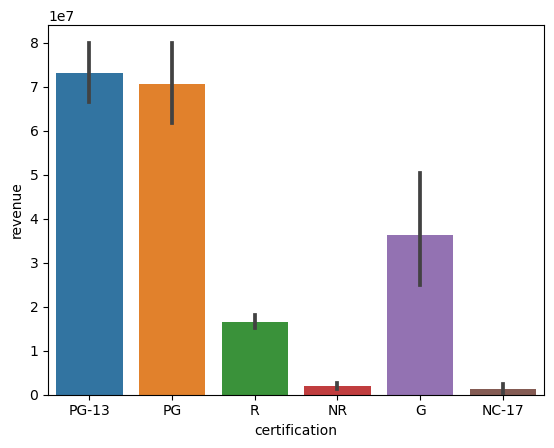

In [271]:
sns.barplot(data=df, x= 'certification', y = 'revenue');

In [272]:
cert_cols = ['certification','revenue']
df[cert_cols]

,certification,revenue
0,NaN,0.0
1,PG-13,0.0
2,NaN,0.0
3,NaN,0.0
4,PG,592461732.0
...,...,...
56593,PG-13,250000.0
56594,NaN,0.0
56595,NR,0.0
56596,NaN,0.0


In [273]:
df = df.dropna()

In [274]:
df = df.drop(columns = ['genres'])

From what we can see from the figure above, PG-13 seems to be the significant.

#### Testing for Normality

In [275]:
groups = {}

for i in df['certification'].unique():
    
    data = df.loc[df['certification']==i, 'revenue']

    groups[i] = data

groups.keys()


dict_keys(['R', 'G', 'PG-13', 'PG', 'NR', 'NC-17'])

#### Checking for Assumptions 

In [276]:
for sector, data in groups.items():

    outliers = np.abs(stats.zscore(data)) > 3
    
    print(f"There were {outliers.sum()} outliers in the {sector} group.")

    data = data.loc[~outliers]
    groups[sector] = data

There were 13 outliers in the R group.
There were 4 outliers in the G group.
There were 8 outliers in the PG-13 group.
There were 5 outliers in the PG group.
There were 4 outliers in the NR group.
There were 1 outliers in the NC-17 group.


#### Testing for Normality 

In [277]:
norm_results = [['group','n','pval','sig?']]

for sector, data in groups.items():
    
    stat, p = stats.normaltest(data)
    
    norm_results.append([sector,len(data), p, p<.05])
    
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

C:\Users\valma\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,group,n,pval,sig?
0,R,545,3.258490e-51,True
1,G,129,3.008568e-21,True
2,PG-13,516,5.611937e-31,True
3,PG,266,5.802201e-18,True
4,NR,158,2.484097e-33,True
5,NC-17,15,1.439733e-09,True


For this instance we did not pass the normal test.

### Levene's Test

In [278]:
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=58.06675194221916, pvalue=1.0416731770918363e-55)


In [279]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


### ANOVA

In [280]:
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=52.872110764604955, pvalue=6.066992697700332e-51)

### TUKEY

In [281]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [282]:
values = df['revenue']
labels = df['certification']

In [283]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-82933304.9892,0.8411,-281514336.6692,115647726.6909,False
G,NR,-61520300.6335,0.3433,-149333160.3187,26292559.0518,False
G,PG,128120622.8141,0.0001,48667557.5276,207573688.1006,True
G,PG-13,169316081.4855,0.0,96450629.858,242181533.1131,True
G,R,-16701667.295,0.9863,-89116335.3067,55713000.7168,False
NC-17,NR,21413004.3557,0.9996,-175250123.7814,218076132.4928,False
NC-17,PG,211053927.8033,0.0227,17978612.8974,404129242.7092,True
NC-17,PG-13,252249386.4747,0.0023,61790305.0859,442708467.8635,True
NC-17,R,66231637.6942,0.9203,-124055439.6017,256518714.9902,False
NR,PG,189640923.4476,0.0,115110732.1893,264171114.7058,True


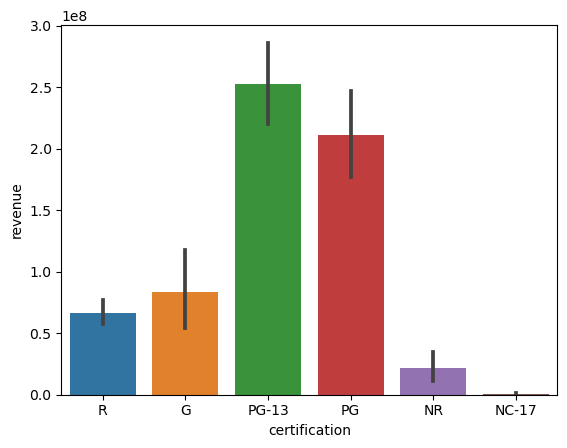

In [314]:
sns.barplot(data=df, x= 'certification', y = 'revenue');

In [ ]:
Based on our results above we will move to rejct the null hypothesis. 

#### Q2. Do movies with different MPAA rating affecting viewer approval ratings?


#### 1. State the Hypothesis & Null Hypothesis

- Null Hypothesis: There is no difference between MPAA ratings affecting overall approval ratings.
- Alternative Hypothesis: There is a significant difference between MPAA ratings affecting overall approval ratings. 

#### 2. Determine the correct test to perform.
- We are dealing with numeric
- We will be sampling more than 2 samples.
- We will conduct ANOVA test.

#### 3. Does the data meet the assumptions of the selected test?
- No significant outliers
- Equal variance
- Normality

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 6 to 56158
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1664 non-null   object 
 1   adult                  1664 non-null   float64
 2   belongs_to_collection  1664 non-null   object 
 3   budget                 1664 non-null   float64
 4   popularity             1664 non-null   float64
 5   release_date           1664 non-null   object 
 6   revenue                1664 non-null   float64
 7   runtime                1664 non-null   float64
 8   title                  1664 non-null   object 
 9   vote_average           1664 non-null   float64
 10  vote_count             1664 non-null   float64
 11  certification          1664 non-null   object 
 12  list_genres            1664 non-null   object 
dtypes: float64(7), object(6)
memory usage: 182.0+ KB


In [285]:
df['certification'].value_counts()

R        558
PG-13    524
PG       271
NR       162
G        133
NC-17     16
Name: certification, dtype: int64

In [286]:
df['vote_average'].value_counts()

6.2    80
6.3    79
6.1    79
6.5    76
6.4    73
       ..
9.8     1
2.0     1
3.3     1
2.2     1
1.6     1
Name: vote_average, Length: 72, dtype: int64

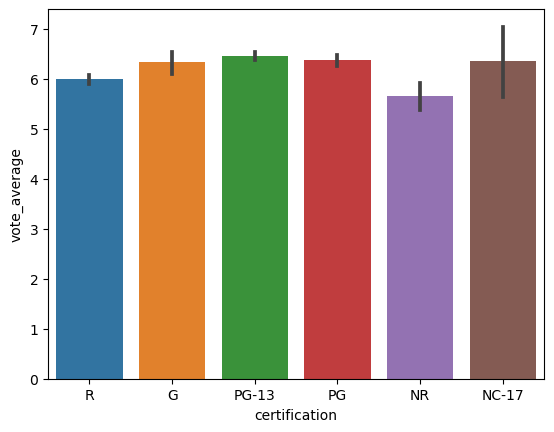

In [287]:
sns.barplot(data=df, x= 'certification', y = 'vote_average');

In [288]:
cert_cols = ['certification','vote_average']
df[cert_cols]

,certification,vote_average
6,R,5.4
11,G,7.8
22,R,5.4
46,PG-13,5.9
48,PG,5.5
...,...,...
55934,NR,6.0
56095,R,5.2
56106,G,7.2
56140,PG-13,7.3


We can see here from the figure above, that there are significant values with NC-17.

### Testing for Normality 

In [289]:
groups = {}

for i in df['certification'].unique():
    
    data = df.loc[df['certification']==i, 'vote_average']

    groups[i] = data

groups.keys()

dict_keys(['R', 'G', 'PG-13', 'PG', 'NR', 'NC-17'])

In [290]:
for sector, data in groups.items():

    outliers = np.abs(stats.zscore(data)) > 3
    
    print(f"There were {outliers.sum()} outliers in the {sector} group.")

    data = data.loc[~outliers]
    groups[sector] = data

There were 3 outliers in the R group.
There were 3 outliers in the G group.
There were 2 outliers in the PG-13 group.
There were 2 outliers in the PG group.
There were 0 outliers in the NR group.
There were 0 outliers in the NC-17 group.


In [291]:
norm_results = [['group','n','pval','sig?']]

for sector, data in groups.items():
    
    stat, p = stats.normaltest(data)
    
    norm_results.append([sector,len(data), p, p<.05])
    
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

C:\Users\valma\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,group,n,pval,sig?
0,R,555,0.000022,True
1,G,130,0.199495,False
2,PG-13,522,0.007864,True
3,PG,269,0.290577,False
4,NR,162,0.000002,True
5,NC-17,16,0.121047,False


#### Levene's Test

In [292]:
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=27.978625751135933, pvalue=2.7796491714393046e-27)


In [293]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


#### ANOVA

In [294]:
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=23.135858168177474, pvalue=1.624319906466398e-22)

TUKEY

In [295]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [296]:
values = df['vote_average']
labels = df['certification']

In [297]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,0.0272,1.0,-0.8181,0.8724,False
G,NR,-0.6829,0.0,-1.0567,-0.3091,True
G,PG,0.0337,0.9998,-0.3045,0.3719,False
G,PG-13,0.1276,0.8493,-0.1825,0.4378,False
G,R,-0.343,0.019,-0.6513,-0.0348,True
NC-17,NR,-0.71,0.1499,-1.5471,0.1271,False
NC-17,PG,0.0065,1.0,-0.8153,0.8283,False
NC-17,PG-13,0.1005,0.9993,-0.7102,0.9112,False
NC-17,R,-0.3702,0.7829,-1.1802,0.4398,False
NR,PG,0.7165,0.0,0.3993,1.0338,True


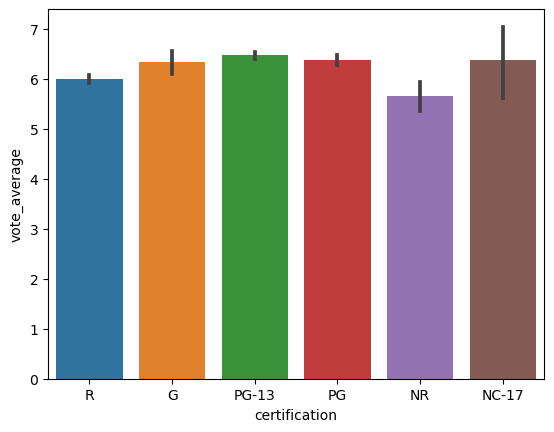

In [313]:
sns.barplot(data=df, x= 'certification', y = 'vote_average');

Based on our results we will move to reject the null hypothesis. 

#### Q3. Do movies with different MPAA ratings have affects on budgets? 

#### 1. State the Hypothesis & Null Hypothesis

- Null Hypothesis: There is no difference between movies with different budgets. 
- Alternative Hypothesis: There is a significant difference between movies with different ratings having different budgets.

#### 2. Determine the correct test to perform.
- We are dealing with numeric
- We will be sampling more than 2 samples.
- We will conduct ANOVA test.

#### 3. Does the data meet the assumptions of the selected test?
- No significant outliers
- Equal variance
- Normality

In [298]:
df

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,list_genres
6,tt0411951,0.0,"{'id': 294172, 'name': 'Tekken Collection', 'p...",30000000.0,70.694,2010-03-20,9.670000e+05,92.0,Tekken,5.4,553.0,R,"[Crime, Drama, Action, Thriller, Science Fiction]"
11,tt0435761,0.0,"{'id': 10194, 'name': 'Toy Story Collection', ...",200000000.0,93.983,2010-06-16,1.066970e+09,103.0,Toy Story 3,7.8,12455.0,G,"[Animation, Family, Comedy]"
22,tt0464154,0.0,"{'id': 104830, 'name': 'Piranha 3D Collection'...",24000000.0,48.675,2010-08-20,8.318816e+07,88.0,Piranha 3D,5.4,1754.0,R,"[Comedy, Horror]"
46,tt0800320,0.0,"{'id': 86780, 'name': 'Clash of the Titans Col...",125000000.0,89.590,2010-03-31,4.932150e+08,106.0,Clash of the Titans,5.9,5305.0,PG-13,"[Adventure, Fantasy, Action]"
48,tt0808510,0.0,"{'id': 222634, 'name': 'Tooth Fairy Collection...",48000000.0,46.385,2010-01-14,1.124625e+08,101.0,Tooth Fairy,5.5,1683.0,PG,"[Comedy, Family, Fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55934,tt1422675,0.0,"{'id': 1972, 'name': 'Ju-on Collection', 'post...",0.0,6.379,2009-06-27,0.000000e+00,61.0,Ju-on: White Ghost,6.0,65.0,NR,[Horror]
56095,tt1467304,0.0,"{'id': 96671, 'name': 'The Human Centipede Col...",2011799.0,62.653,2009-04-26,2.522070e+05,92.0,The Human Centipede (First Sequence),5.2,1678.0,R,[Horror]
56106,tt1468843,0.0,"{'id': 661026, 'name': 'Pokémon: Diamond and P...",0.0,27.480,2009-07-18,5.067308e+07,94.0,Pokémon: Arceus and the Jewel of Life,7.2,218.0,G,"[Family, Animation, Adventure, Fantasy]"
56140,tt1481363,0.0,"{'id': 23616, 'name': 'Naruto Collection', 'po...",0.0,69.624,2009-08-01,8.084148e+06,95.0,Naruto Shippuden the Movie: The Will of Fire,7.3,311.0,PG-13,"[Action, Adventure, Comedy, Drama, Fantasy, An..."


In [299]:
df['budget'].value_counts()

0.0            634
10000000.0      36
20000000.0      33
40000000.0      29
150000000.0     28
              ... 
14350531.0       1
8520000.0        1
195000000.0      1
13500000.0       1
2011799.0        1
Name: budget, Length: 263, dtype: int64

In [300]:
df['certification'].value_counts()

R        558
PG-13    524
PG       271
NR       162
G        133
NC-17     16
Name: certification, dtype: int64

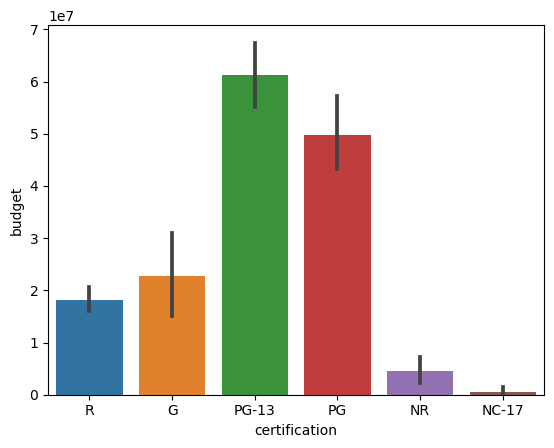

In [301]:
sns.barplot(data=df, x= 'certification', y = 'budget');

In [302]:
cert_cols = ['certification','budget']
df[cert_cols]

,certification,budget
6,R,30000000.0
11,G,200000000.0
22,R,24000000.0
46,PG-13,125000000.0
48,PG,48000000.0
...,...,...
55934,NR,0.0
56095,R,2011799.0
56106,G,0.0
56140,PG-13,0.0


In [303]:
groups = {}

for i in df['certification'].unique():
    
    data = df.loc[df['certification']==i, 'budget']

    groups[i] = data

groups.keys()

dict_keys(['R', 'G', 'PG-13', 'PG', 'NR', 'NC-17'])

In [304]:
for sector, data in groups.items():

    outliers = np.abs(stats.zscore(data)) > 3
    
    print(f"There were {outliers.sum()} outliers in the {sector} group.")

    data = data.loc[~outliers]
    groups[sector] = data

There were 10 outliers in the R group.
There were 5 outliers in the G group.
There were 5 outliers in the PG-13 group.
There were 3 outliers in the PG group.
There were 3 outliers in the NR group.
There were 1 outliers in the NC-17 group.


In [305]:
norm_results = [['group','n','pval','sig?']]

for sector, data in groups.items():
    
    stat, p = stats.normaltest(data)
    
    norm_results.append([sector,len(data), p, p<.05])
    
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

C:\Users\valma\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,group,n,pval,sig?
0,R,548,5.374258e-41,True
1,G,128,6.861528e-16,True
2,PG-13,519,2.576006e-17,True
3,PG,268,9.416094e-09,True
4,NR,159,3.199604e-37,True
5,NC-17,15,1.439733e-09,True


#### Levene's Test

In [306]:
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=81.45109477022747, pvalue=1.7964041611692918e-76)


In [307]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


#### ANOVA

In [308]:
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=64.65916550223892, pvalue=1.0716244758639364e-61)

#### TUKEY

In [309]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [310]:
values = df['budget']
labels = df['certification']

In [311]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-22277426.7594,0.6116,-62490637.0249,17935783.5061,False
G,NR,-18256444.7038,0.0402,-36038792.5981,-474096.8096,True
G,PG,27045267.8126,0.0,10955801.4946,43134734.1305,True
G,PG-13,38569386.9582,0.0,23813930.6963,53324843.22,True
G,R,-4582336.6644,0.9486,-19246507.9925,10081834.6637,False
NC-17,NR,4020982.0556,0.9997,-35803847.4176,43845811.5287,False
NC-17,PG,49322694.572,0.0044,10224407.2396,88420981.9044,True
NC-17,PG-13,60846813.7176,0.0001,22278320.9362,99415306.4989,True
NC-17,R,17695090.095,0.7795,-20838571.38,56228751.57,False
NR,PG,45301712.5164,0.0,30209141.8573,60394283.1755,True


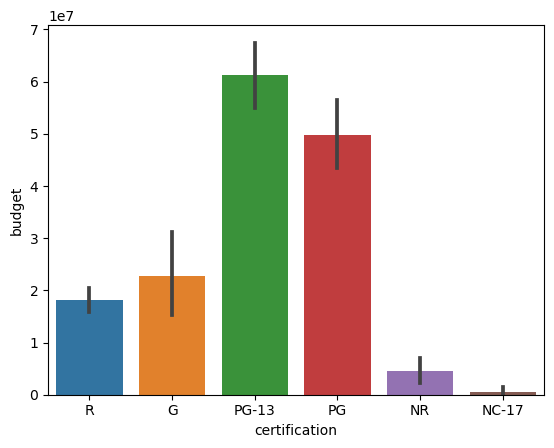

In [312]:
sns.barplot(data=df, x= 'certification', y = 'budget');

Looking over our results- overall based on the question above, we reject the null hypothesis. 
 - We can assume based on these results that movies with PG-13 and PG movies do have higher budgets out of other ratings.